In [8]:
import tensorflow as tf
import utils as ut
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = ut.loadData("./models/augmented_data")
labels = ut.loadData("./models/augmented_labels")
classes = ut.loadData("./models/classes")

In [10]:
print(len(data))
print(len(labels))

405900
405900


In [11]:
for i in range(len(labels)):
    id = classes[labels[i]]
    labels[i] = id
data = [data[i]/255 for i in range(len(data))]


In [12]:
labels = np.array(labels, dtype=np.uint8)
data = np.array(data, dtype=np.uint8)
print(type(data))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.1)
print(len(data_train))
print(len(data_test))
print(len(labels_train))
print(len(labels_test))

365310
40590
365310
40590


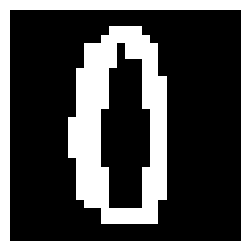

In [15]:
ut.show(data_train[0])

# ANN

In [17]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(
        input_shape = (28,28,1)
    )
    ,tf.keras.layers.Dense(
        units = 64
        ,activation="sigmoid"
    )
    ,tf.keras.layers.Dense(
        units = 128
        ,activation = "sigmoid"
    ),
    tf.keras.layers.Dense(
        units = 128
        ,activation = "sigmoid"
    )
    ,tf.keras.layers.Dense(
        units = 256
        ,activation="sigmoid"
    )
    ,tf.keras.layers.Dense(
        units = 36
        ,activation = "softmax"
    )
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 36)                9252      
                                                                 
Total params: 117348 (458.39 KB)
Trainable params: 11734

2024-01-10 18:43:26.844381: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history =  model.fit(
    data_train
    ,labels_train
    ,epochs = 256
)

Epoch 1/256


2024-01-10 18:43:35.084198: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 286403040 exceeds 10% of free system memory.


11416/11416 [==============================] - 38s 3ms/step - loss: 1.0978 - accuracy: 0.6897
Epoch 2/256
11416/11416 [==============================] - 37s 3ms/step - loss: 0.5908 - accuracy: 0.8276
Epoch 3/256
11416/11416 [==============================] - 41s 4ms/step - loss: 0.4848 - accuracy: 0.8557
Epoch 4/256
11416/11416 [==============================] - 37s 3ms/step - loss: 0.4298 - accuracy: 0.8698
Epoch 5/256
11416/11416 [==============================] - 37s 3ms/step - loss: 0.3918 - accuracy: 0.8797
Epoch 6/256
11416/11416 [==============================] - 36s 3ms/step - loss: 0.3632 - accuracy: 0.8876
Epoch 7/256
11416/11416 [==============================] - 34s 3ms/step - loss: 0.3405 - accuracy: 0.8940
Epoch 8/256
11416/11416 [==============================] - 39s 3ms/step - loss: 0.3210 - accuracy: 0.8991
Epoch 9/256
11416/11416 [==============================] - 33s 3ms/step - loss: 0.3053 - accuracy: 0.9033
Epoch 10/256
11416/11416 [==============================] 

In [19]:
model.evaluate(data_test, labels_test)

1269/1269 [==============================] - 3s 2ms/step - loss: 0.9905 - accuracy: 0.8752


[0.9904822111129761, 0.8751662969589233]

In [20]:
model.save("./models/ann_7")

INFO:tensorflow:Assets written to: ./models/ann_7/assets


INFO:tensorflow:Assets written to: ./models/ann_7/assets


# CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        32
        ,(3,3)
        ,input_shape = (28,28,1)
        ,activation = "relu"
    )
    ,tf.keras.layers.MaxPooling2D(2,2)
    ,tf.keras.layers.Conv2D(
        64
        ,(3,3)
        ,activation = "relu"
    )
    ,tf.keras.layers.MaxPooling2D(2,2)
    ,tf.keras.layers.Flatten()
    ,tf.keras.layers.Dense(
        units = 64
        ,activation="relu"
    )
    ,tf.keras.layers.Dense(
        units = 128
        ,activation = "relu"
    )
    ,tf.keras.layers.Dense(
        units = 36
        ,activation = "softmax"
    )
])
model.summary()

# TEST

In [21]:
from tensorflow.keras.models import load_model
import data_preparation as dp
import cv2 as cv
import utils as ut

In [22]:
def find_key(item):
    for key, _item in classes.items():
        if item == _item:
            return key

In [23]:
def predict(img):
    ut.show(img[0])
    y = loaded_model.predict(img)
    y = y.tolist()
    y = y[0]
    ids = list(range(36))
    y = list(zip(y, ids))
    y = sorted(y, key = lambda y: y[0])
    print(y[-1])
    r = find_key(y[-1][1])
    print(r)


In [24]:
classes = ut.loadData("./models/classes")
print(classes)

{'B': 0, 'H': 1, '0': 2, 'Q': 3, 'V': 4, '9': 5, 'A': 6, 'K': 7, '4': 8, '5': 9, 'E': 10, '2': 11, 'G': 12, '7': 13, 'M': 14, 'U': 15, 'Y': 16, 'I': 17, 'W': 18, 'Z': 19, 'D': 20, 'P': 21, 'N': 22, 'S': 23, 'F': 24, '1': 25, '6': 26, '3': 27, 'L': 28, 'C': 29, 'X': 30, 'R': 31, '8': 32, 'O': 33, 'J': 34, 'T': 35}


In [25]:
# ann 5 works well
# ann 6 works well
loaded_model = load_model("./models/ann_7")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 36)                9252      
                                                                 
Total params: 117348 (458.39 KB)
Trainable params: 11734

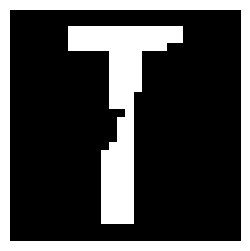

1/1 [==============================] - 0s 35ms/step
(0.999923586845398, 35)
T


In [34]:
img = cv.imread("/home/lenin/Documents/chars/t.png", cv.IMREAD_GRAYSCALE)
_, img = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
img = dp.prepare_img(img)
predict(img)
